In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

#Algoritma yang digunakan
from sklearn.ensemble import RandomForestClassifier

#Metrics untuk mengevaluasi model
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [63]:
# Baca Dataset yang telah diupload sebelumnya
data = pd.read_excel("Numeric-Data-Peminjam.xlsx")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Nomor_Rekening         600 non-null    object
 1   Nama                   600 non-null    object
 2   Usia                   600 non-null    int64 
 3   JK                     600 non-null    int64 
 4   Pekerjaan              600 non-null    int64 
 5   Alamat                 600 non-null    object
 6   Jumlah Pinjaman (000)  600 non-null    int64 
 7   Jumlah_Pinjaman        600 non-null    int64 
 8   Kategori_Pinjaman      600 non-null    int64 
 9   Diterima               600 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 47.0+ KB


In [64]:
#DATA CLEANING
#Pengecekan data yang tidak ada nilainya
data.isnull().sum()
data.head()

,Nomor_Rekening,Nama,Usia,JK,Pekerjaan,Alamat,Jumlah Pinjaman (000),Jumlah_Pinjaman,Kategori_Pinjaman,Diterima
0,123456789001,Alesha,21,0,12,Jalan Mawar,10000000,10000,1,1
1,234567890102,Arsyakayla,22,0,7,Jalan Melati,5000000,5000,1,0
2,345678901203,Alea,23,0,14,Jalan Anggrek,8000000,8000,1,0
3,456789012304,Athayya,24,1,5,Jalan Rafflesia,15000000,15000,2,1
4,567890123405,Alvarendra,25,1,5,Jalan Tulip,3000000,3000,1,1


In [65]:
#Pengecekan Fired Kriteria Prediksi
num_cols = ['Usia', 'JK', 'Pekerjaan', 'Kategori_Pinjaman']
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Usia,600.0,48.325,17.604428,21.0,33.0,47.0,63.25,80.0
JK,600.0,0.390,0.488157,0.0,0.0,0.0,1.00,1.0
Pekerjaan,600.0,9.800,4.485927,1.0,6.0,10.0,14.00,16.0
Kategori_Pinjaman,600.0,5.085,2.590165,1.0,3.0,5.0,8.00,9.0


In [66]:
#Menghapus field yang tidak diperlukan
data = data.drop(columns=['Nomor_Rekening', 'Nama', 'Alamat', 'Jumlah Pinjaman (000)', 'Jumlah_Pinjaman'])

#Membuat Label X dan Y. X = Kriteria, Y = Kelas yang diharapkan
x = data.drop(["Diterima"],axis = 1)
y = data["Diterima"]

In [67]:
#Membagi data menjadi 20% Data Testing dan 80% Data Training
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 70)
print('Number of records for train',X_train.shape)
print('Number of records for test',X_test.shape)
print('Number of records for train',y_train.shape)
print('Number of records for test',y_test.shape)

Number of records for train (480, 4)
Number of records for test (120, 4)
Number of records for train (480,)
Number of records for test (120,)


In [68]:
#Membuat Ukuran Evaluasi dengan Metrics_Score
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [69]:
#Memasukan Algoritma Klasifikasi 
rf_estimator_tuned = RandomForestClassifier(criterion="entropy", random_state=7)

#Kisi-kisi parameter yang dapat dipilih
parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1]
             }

#Jenis penilaian yang digunakan untuk membandingkan kombinasi parameter - skor recall untuk kelas 0
scorer = metrics.make_scorer(recall_score, pos_label=0)

#Jalankan pencarian kisi-kisi
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

#Tetapkan clf ke kombinasi parameter terbaik
rf_estimator_tuned = grid_obj.best_estimator_

              precision    recall  f1-score   support

           0       0.95      0.84      0.90       225
           1       0.88      0.96      0.92       255

    accuracy                           0.91       480
   macro avg       0.92      0.90      0.91       480
weighted avg       0.91      0.91      0.91       480



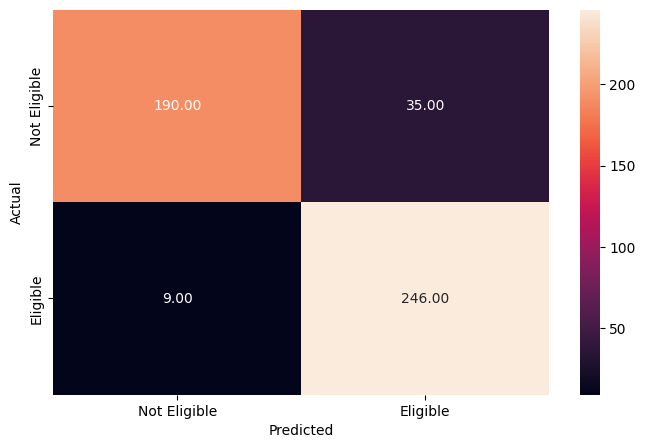

In [70]:
#Menyesuaikan algoritma terbaik dengan data pelatihan
rf_estimator_tuned.fit(X_train, y_train)

#Pengecekan kinerja pada data pelatihan
y_pred_train4 = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train4)

modelRF = rf_estimator_tuned.fit(X_train, y_train)

In [71]:
rfc_base=modelRF.fit(X_train,y_train)
rfc_pred=rfc_base.predict(X_test)

from sklearn.metrics import classification_report,accuracy_score,roc_auc_score
print('Classification report \n',classification_report(y_test,rfc_pred))
y_train_pred=rfc_base.predict(X_train)
y_train_prob=rfc_base.predict_proba(X_train)[:,1]
y_test_prob=rfc_base.predict_proba(X_test)[:,1]
 
print('Train Accuracy',accuracy_score(y_train,y_train_pred))
print('Train AUC',roc_auc_score(y_train,y_train_prob))
print()
print('Test Accuracy',accuracy_score(y_test,rfc_pred))
print('Test AUC',roc_auc_score(y_test,y_test_prob))

Classification report 
               precision    recall  f1-score   support

           0       0.93      0.67      0.78        57
           1       0.76      0.95      0.85        63

    accuracy                           0.82       120
   macro avg       0.84      0.81      0.81       120
weighted avg       0.84      0.82      0.81       120

Train Accuracy 0.9083333333333333
Train AUC 0.9783267973856209

Test Accuracy 0.8166666666666667
Test AUC 0.9168755221386801


In [72]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(rfc_base, open(filename, 'wb'))

In [75]:
#Percobaan
model = pickle.load( open( "finalized_model.pkl", "rb" ) )
prediction = model.predict(np.array([[21,0,12,1]]))

if prediction == 1 :
    hasil = "Status Ajuan : ACCEPTED"
else:
    hasil = "Status Ajuan : REJECTED"
    
print(hasil)

Status Ajuan : ACCEPTED


In [ ]:
from flask import Flask, jsonify, make_response, request, render_template, abort, redirect, url_for, session
import pandas as pd
import numpy as np
import pickle
import mysql.connector
import re

from flask_cors import CORS,cross_origin
model = pickle.load( open( "finalized_model.pkl", "rb" ) )
app = Flask(__name__)
app.config['CORS_HEADERS'] = 'Content-Type'
app.secret_key = 'DIANCCIT1234'

#Koneksi Database
conn = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="",
  database="loan_prediction"
    
)
#Buat Kursor (Penunjuk)
cursor = conn.cursor()

#Cek Koneksi Berhasil ?
if conn.is_connected():
  print("Berhasil terhubung ke database")

#Error Page
cors = CORS(app)
@app.errorhandler(404)
def not_found(error):
    return make_response(jsonify({'error': 'Not found'}), 404)

#Halaman Pertama Kali
@app.route("/")
def index():
   return render_template('login.html')

#Halaman Utama / Home
@app.route("/home")
def home():
    # Check if user is loggedin
    if 'loggedin' in session:
        # User is loggedin show them the home page
        return render_template('home.html', username=session['username'])
    # User is not loggedin redirect to login page
    return redirect(url_for('login'))

#Menu Profile
@app.route('/predict')
def predict():
    if 'loggedin' in session:
        return render_template('index.html')
    else :
        return render_template('login.html')

#Fungsi Cek Login
@app.route("/login", methods=['GET', 'POST', 'OPTIONS'])
def login():
    # Output message if something goes wrong...
    msg = ''
    # Check if "username" and "password" POST requests exist (user submitted form)
    if request.method == 'POST' and 'username' in request.form and 'password' in request.form:
        # Create variables for easy access
        username = request.form['username']
        password = request.form['password']
        # Check if account exists using MySQL
        cursor.execute('SELECT * FROM accounts WHERE username = %s AND password = %s', (username, password,))
        # Fetch one record and return result
        account = cursor.fetchone()
        # If account exists in accounts table in out database
        if account:
            # Create session data, we can access this data in other routes
            session['loggedin'] = True
            session['username'] = username
            # Redirect to home page
            return render_template('home.html', msg=session['username'])
        else:
            # Account doesnt exist or username/password incorrect
            msg = 'Incorrect username/password!'
    # Show the login form with message (if any)
    return render_template('login.html', msg=msg)

#Fungsi Logout
@app.route("/logout")
def logout():
    # Remove session data, this will log the user out
   session.pop('loggedin', None)
   session.pop('id', None)
   session.pop('username', None)
   # Redirect to login page
   return render_template('login.html')

@app.route("/register", methods=['GET', 'POST'])
def register():
    # Output message if something goes wrong...
    msg = ''
    # Check if "username", "password" and "email" POST requests exist (user submitted form)
    if request.method == 'POST' and 'loggedin' not in session and 'username' in request.form and 'password' in request.form and 'email' in request.form:
        # Create variables for easy access
        username = request.form['username']
        password = request.form['password']
        email = request.form['email']
        cursor.execute('SELECT * FROM accounts WHERE username = %s', (username,))
        account = cursor.fetchone()
        # If account exists show error and validation checks
        if account:
            msg = 'Account already exists!'
        elif not re.match(r'[^@]+@[^@]+\.[^@]+', email):
            msg = 'Invalid email address!'
        elif not re.match(r'[A-Za-z0-9]+', username):
            msg = 'Username must contain only characters and numbers!'
        elif not username or not password or not email:
            msg = 'Please fill out the form!'
        else:
            # Account doesnt exists and the form data is valid, now insert new account into accounts table
            cursor.execute('INSERT INTO accounts VALUES (NULL, %s, %s, %s)', (username, password, email,))
            conn.commit()
            msg = 'You have successfully registered!'
            # Redirect to home page
            return render_template('login.html', msg=msg)
    elif request.method == 'POST':
        # Form is empty... (no POST data)
        msg = 'Please fill out the form!'
    # Show registration form with message (if any)
    return render_template('register.html', msg=msg)

#Prediksi Data
@app.route("/get_prediction", methods=['POST','OPTIONS'])
@cross_origin()
def get_prediction():
    if request.method == 'POST' and 'loggedin' in session and 'norek' in request.form  and 'name' in request.form and 'umur' in request.form and 'sex' in request.form and 'pekerjaan' in request.form and 'peminjaman' in request.form :
        norek = request.form['norek']
        name = request.form['name']
        umur = request.form['umur']
        pekerjaan = request.form['pekerjaan']
        sex = request.form['sex']
        peminjaman = request.form['peminjaman']     
        
        x = peminjaman.replace("Rp. ", "")
        peminjaman = x.replace(".", "")
        
        if ((int(peminjaman)>=1000000)and(int(peminjaman)<=10000000)):
            loan = 1
        elif ((int(peminjaman)>=10000001)and(int(peminjaman)<=50000000)):
            loan = 2
        elif ((int(peminjaman)>=50000001)and(int(peminjaman)<=100000000)):
            loan = 3
        elif ((int(peminjaman)>=100000001)and(int(peminjaman)<=200000000)):
            loan = 4
        elif ((int(peminjaman)>=200000001)and(int(peminjaman)<=300000000)):
            loan = 5
        elif ((int(peminjaman)>=300000001)and(int(peminjaman)<=400000000)):
            loan = 6
        elif ((int(peminjaman)>=400000001)and(int(peminjaman)<=500000000)):
            loan = 7
        elif ((int(peminjaman)>=500000001)and(int(peminjaman)<=750000000)):
            loan = 8
        elif ((int(peminjaman)>=750000001)and(int(peminjaman)<=1000000000)):
            loan = 9
        else:
            "Salah"
        
        #Prediksi Data
        prediction=model.predict(np.array([[umur, sex, pekerjaan, loan]]))
        
        if prediction == 1 :
            hasil = "ACCEPTED"
            #Save to Database
            cursor.execute('INSERT INTO loan_data VALUES (NULL, %s, %s, %s, %s, %s, %s, %s)', (norek, name, umur, sex, pekerjaan, peminjaman, hasil,))
            conn.commit()
            return render_template('index.html',prediction_text="Status : {} ".format(hasil))
        else:
            hasil = "REJECTED"
            #Save to Database
            cursor.execute('INSERT INTO loan_data VALUES (NULL, %s, %s, %s, %s, %s, %s, %s)', (norek, name, umur, sex, pekerjaan, peminjaman, hasil,))
            conn.commit()
            return render_template('index.html',prediction_text="Status : {} ".format(hasil))     
        
    else:
        return render_template('index.html')
    
#Awal Halaman
@app.route('/loan-list')
def sales():
    if 'loggedin' in session:
        container = []
        sql = "SELECT * FROM loan_data"
        cursor.execute(sql)
        results = cursor.fetchall()
        for data in results:
            container.append(data)
        return render_template('loan-list.html', container=container,)
    else :
        return render_template('login.html')
    
#Hapus data
@app.route('/hapus/<id_acc>', methods=['POST','GET'])
def hapus(id_acc):
    if 'loggedin' in session:
        cursor.execute('DELETE FROM loan_data WHERE id=%s', (id_acc,))
        conn.commit()
        return render_template('loan-list.html')
    else :
        return render_template('login.html')
    
if __name__ == "__main__":
  app.run()

Berhasil terhubung ke database
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
